### Notebook to reproduce Fig 3 ROC Curve in Tom Fawcett's "An Introduction to ROC analysis"

https://people.inf.elte.hu/kiss/13dwhdm/roc.pdf

In [1]:
import pandas as pd

In [2]:
classes = 'Y Y N Y Y Y N N Y N Y N Y N N N Y N Y N'.split()
scores = [ .9, .8, .7, .6, .55, .54, .53, .52, .51, .505, .4, .39, .38, .37, .36, .35, .34, .33, .30, .1]

df = pd.DataFrame({"Loan_Status":classes, "Scored Probabilities":scores})
df.head()

,Loan_Status,Scored Probabilities
0,Y,0.90
1,Y,0.80
2,N,0.70
3,Y,0.60
4,Y,0.55


In [3]:
for x in range(100, 0, -1):
    threshold = 'Threshold_' + str(x)
    if threshold in df: del df[threshold]
    df[threshold] = df['Scored Probabilities'].apply(lambda score: 'Y' if score >= float(x/100) else 'N')

In [4]:
df.head()

,Loan_Status,Scored Probabilities,Threshold_100,Threshold_99,Threshold_98,Threshold_97,Threshold_96,Threshold_95,Threshold_94,Threshold_93,...,Threshold_10,Threshold_9,Threshold_8,Threshold_7,Threshold_6,Threshold_5,Threshold_4,Threshold_3,Threshold_2,Threshold_1
0,Y,0.90,N,N,N,N,N,N,N,N,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
1,Y,0.80,N,N,N,N,N,N,N,N,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
2,N,0.70,N,N,N,N,N,N,N,N,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
3,Y,0.60,N,N,N,N,N,N,N,N,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
4,Y,0.55,N,N,N,N,N,N,N,N,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y


In [5]:
total_positives = sum(df['Loan_Status'] == 'Y')
total_positives

10

In [6]:
total_negatives = sum(df['Loan_Status'] == 'N')
total_negatives

10

In [7]:
X = []
Y = []
for x in range(100, 0, -1):
    threshold = 'Threshold_' + str(x)
    
    try:
        true_positives = len(df[(df['Loan_Status'] == 'Y') & (df[threshold] == 'Y')])
        tpr = true_positives/total_positives
    except:
        tpr = 0
    
    try:
        false_positive = len(df[(df['Loan_Status'] == 'N') & (df[threshold] == 'Y')])
        fpr = false_positive/total_negatives
    except:
        fpr = 0
    
    X.append(fpr)
    Y.append(tpr)

In [8]:
#list(zip(X, Y))

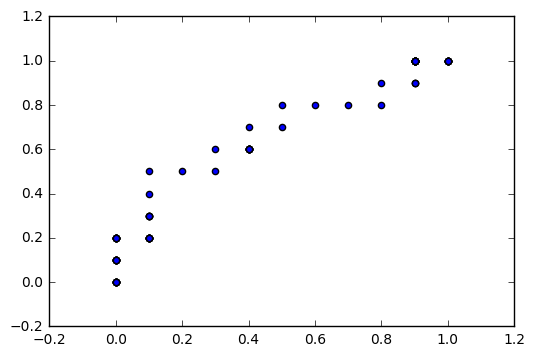

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.show()